# APPM 4600 Homework 4
## Kevin Stull
### Problem 1

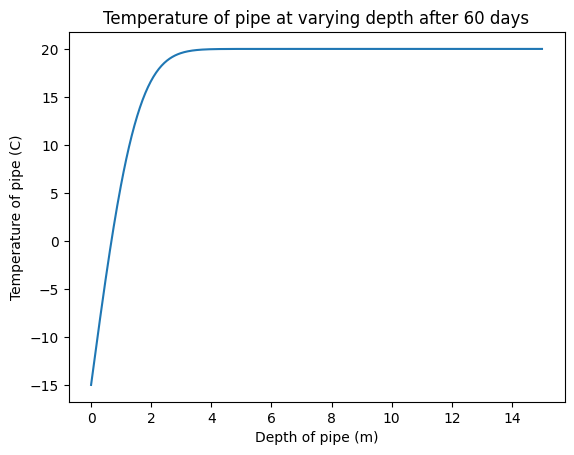

In [ ]:
# libraries
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

# parameters
T_i = 20
T_s = -15
tol = 1E-13
t = 5.184E6
alpha = 0.138E-6 # this was not given in problem statement
x_arr = np.linspace(0,15, 500)
y_arr = np.zeros(len(x_arr))

# calculating y_arr
for i in range(len(x_arr)):
  y_arr[i] = sp.erf(x_arr[i]/(2*(alpha*t)**0.5))*(T_i - T_s) + T_s

# plotting y_arr
plt.plot(x_arr, y_arr)
plt.xlabel('Depth of pipe (m)')
plt.ylabel('Temperature of pipe (C)')
plt.title("Temperature of pipe at varying depth after 60 days")
plt.show()

a) From this graph we can see that the pipe needs to be about 6 meters deep or deeper in order to meet the desired specifications.



In [ ]:
# bisection root finder
def bisection(f,a,b,tol):

#    Inputs:
#     f,a,b       - function and endpoints of initial interval
#      tol  - bisection stops when interval length < tol

#    Returns:
#      astar - approximation of root
#      ier   - error message
#            - ier = 1 => Failed
#            - ier = 0 == success

#     first verify there is a root we can find in the interval

    fa = f(a)
    fb = f(b);
    if (fa*fb>0):
       ier = 1
       astar = a
       return [astar, ier]

#   verify end points are not a root
    if (fa == 0):
      astar = a
      ier =0
      return [astar, ier]

    if (fb ==0):
      astar = b
      ier = 0
      return [astar, ier]

    count = 0
    d = 0.5*(a+b)
    while (abs(d-a)> tol):
      fd = f(d)
      if (fd ==0):
        astar = d
        ier = 0
        return [astar, ier]
      if (fa*fd<0):
         b = d
      else:
        a = d
        fa = fd
      d = 0.5*(a+b)
      count = count +1
    astar = d
    ier = 0
    return [astar, ier]

def newton(f,fp,p0,tol,Nmax):
  """
  Newton iteration.

  Inputs:
    f,fp - function and derivative
    p0   - initial guess for root
    tol  - iteration stops when p_n,p_{n+1} are within tol
    Nmax - max number of iterations
  Returns:
    p     - an array of the iterates
    pstar - the last iterate
    info  - success message
          - 0 if we met tol
          - 1 if we hit Nmax iterations (fail)

  """
  p = np.zeros(Nmax+1);
  p[0] = p0
  for it in range(Nmax):
      p1 = p0-f(p0)/fp(p0)
      p[it+1] = p1
      if (abs(p1-p0) < tol):
          pstar = p1
          info = 0
          return [p,pstar,info,it]
      p0 = p1
  pstar = p1
  info = 1
  return [p,pstar,info,it]

In [ ]:
# libraries
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

# parameters
T_i = 20
T_s = -15
tol = 1E-13
t = 5.184E6
alpha = 0.138E-6 # this was not given in problem statement
x_arr = np.linspace(0,15, 500)
y_arr = np.zeros(len(x_arr))

# calculating y_arr
for i in range(len(x_arr)):
  y_arr[i] = sp.erf(x_arr[i]/(2*(alpha*t)**0.5))*(T_i - T_s) + T_s

# finding the root
f = lambda x: sp.erf(x/(2*(alpha*t)**0.5))*(T_i - T_s) + T_s
a = 0
b = 14

[astar,ier] = bisection(f,a,b,tol)
print('the approximate root is',astar)
print('the error message reads:',ier)
print('f(astar) =', f(astar))

the approximate root is 0.6769618544818599
the error message reads: 0
f(astar) = -1.5258905250448151e-12


b) Confirming our intuition from the plot, the root is approximately 5.76. So A depth of 6m is a pretty good guideline.

In [ ]:
# libraries
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt

# parameters
T_i = 20
T_s = -15
tol = 1E-13
t = 5.184E6
alpha = 0.138E-6 # this was not given in problem statement
x_arr = np.linspace(0,15, 500)
y_arr = np.zeros(len(x_arr))

# calculating y_arr
for i in range(len(x_arr)):
  y_arr[i] = sp.erf(x_arr[i]/(2*(alpha*t)**0.5))*(T_i - T_s) + T_s

# finding the root
f = lambda x: sp.erf(x/(2*(alpha*t)**0.5))*(T_i - T_s) + T_s
fp = lambda x: (2/(np.pi)**0.5) * np.exp(-1*(x/(2*(alpha*t)**0.5)**2))*(T_i - T_s)
p0 = 0.6769618544818599
Nmax = 1000
(p,pstar,info,it) = newton(f,fp,p0,tol, Nmax)
print('the approximate root is', '%16.16e' % pstar)
print('the error message reads:', '%d' % info)
print('Number of iterations:', '%d' % it)

the approximate root is 6.7696185448190882e-01
the error message reads: 0
Number of iterations: 0


c) Once again we were able to find the root and it is in the same location. Notably, if we set $x_0 = \bar{x}$ then it converges in 0 iterations.

### Problem 4


In [ ]:
# libraries
import numpy as np

# function of x
f = lambda x: np.exp(3*x)-27*x**6+(27*x**4)*(np.exp(x))-(9*x**2)*(np.exp(2*x))

# derivative of f
fp = lambda x: 3*(np.exp(x)-6*x)*(np.exp(x)-3*x**2)**2

# function for f/fp
f_fp = lambda x: f(x) / fp(x)

# function for derivative of f/fp
f_fpp = lambda x: (6*x**2 + np.exp(x)*(x**2 -4*x + 2)) / (np.exp(x) - 6*x**2)**2

# method from 2c
g = lambda x: x - 2*f_fp(x)

# derivative of method from 2c
gp = lambda x: 1 - 2*f_fpp(x)

# newton's method of root finding
def newton(f,fp,p0,tol,Nmax):
  p = np.zeros(Nmax+1);
  p[0] = p0
  for it in range(Nmax):
      p1 = p0-f(p0)/fp(p0)
      p[it+1] = p1
      if (abs(p1-p0) < tol):
          pstar = p1
          info = 0
          return [p,pstar,info,it]
      p0 = p1
  pstar = p1
  info = 1
  return [p,pstar,info,it]

# parameters
a = 3
b = 5
tol = 1E-13
# ground_truth_root = 3.7330790286328142006
Nmax = 1000

# calculating output of Newton's method
p1, pstar1, info1, it1 = newton(f, fp, a, tol, Nmax)
print('root:',pstar1, 'error code:',info1,'number of iterations:', it1)

# calculating the output of the method from class
#p2, pstar2, info2, it2 = newton(f_fp, f_fpp, a, tol, Nmax)
#print(pstar2, info2, it2)
print('2nd method overflows and does not converge.')

# calculating the output of method from 2c
p3, pstar3, info3, it3 = newton(g, gp, a, tol, Nmax)
print('root:', pstar3, 'error code:',info3, 'number of iterations:', it3)


root: 3.733095667492544 error code: 0 number of iterations: 27
2nd method overflows and does not converge.
root: -0.3431313688576811 error code: 1 number of iterations: 999


I prefer the 1st method because it converges for me.

### Problem 5

Newton's method: root: 1.1347241384015194 Number of iterations: 8
Secant method: root: 1.1347241384015194 Number of iterations: 9

         Newton : Secant
[[8.65275862e-01 1.34724138e-01]
 [5.45904134e-01 1.18595106e-01]
 [2.96014850e-01 5.58536303e-02]
 [1.20246818e-01 1.70683075e-02]
 [2.68142944e-02 2.19258819e-03]
 [1.62913577e-03 9.26696033e-05]
 [6.38994211e-06 4.92452815e-07]
 [9.87017135e-11 1.10303544e-10]
 [0.00000000e+00 2.22044605e-16]
 [0.00000000e+00 0.00000000e+00]]



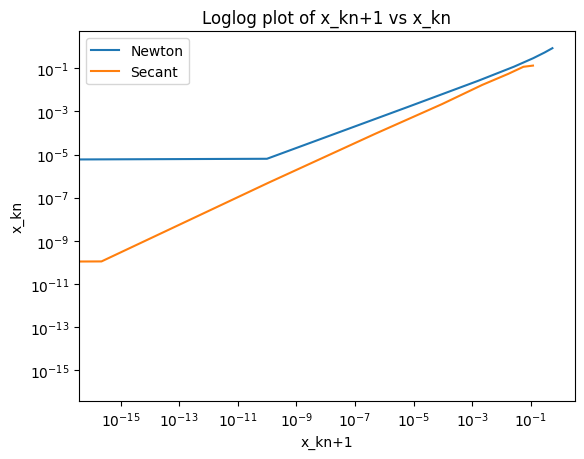

In [ ]:
# libraries
import numpy as np
import matplotlib.pyplot as plt

# function and its derivative
f = lambda x: x**6 - x - 1
fp = lambda x: 6*x**5 - 1

# Newton's method
def newton(f,fp,p0,tol,Nmax):
  p = np.zeros(Nmax+1);
  p[0] = p0
  for it in range(Nmax):
      p1 = p0-f(p0)/fp(p0)
      p[it+1] = p1
      if (abs(p1-p0) < tol):
          pstar = p1
          info = 0
          return [p,pstar,info,it]
      p0 = p1
  pstar = p1
  info = 1
  return [p,pstar,info,it]

# Secant method
def secant(p0, p1, f, tol, Nmax):
  ier = -1
  pstar = float()
  p = np.zeros(Nmax)

  if abs(f(p0)) < tol:
    p[0] = p0
    pstar = p0
    ier = 0
    return p, pstar, ier , 0
  elif abs(f(p1)) < tol:
    p[0] = p1
    pstar = p1
    ier = 0
    return p, pstar, ier , 0
  p[0] = p1
  for i in range(1, Nmax):
    if abs(f(p0) - f(p1)) == 0:
      ier = 1
      pstar = p1
      #print("Dividing by 0 is bad!")
      return p, pstar, ier, i
    p2 = p1 - (f(p1)*(p1 - p0))/(f(p1) - f(p0))
    p[i] = p2
    if abs(p2-p1) < tol:
      pstar = p2
      ier = 0
      return p, pstar, ier, i
    p0 = p1
    p1 = p2
  #print('Reached Nmax iteration without converging!')
  return p, pstar, 1, i

# parameters
x_0 = 2
x_1 = 1
tol = 1E-13
Nmax = 100

# using Newton's method
guesses_newton, root, error, iter = newton(f, fp, x_0, tol, Nmax)
print('Newton\'s method: root:', root,'Number of iterations:', iter)

# using secant method
guesses_secant, root, error, iter = secant(x_0, x_1, f, tol, Nmax)
print('Secant method: root:', root,'Number of iterations:', iter)
print()

# Use the true root to compute error by iteration
root = 1.1347241384015194
error_newton = []
error_secant = []
for i in range(Nmax):
  if guesses_newton[i] != 0:
    error_newton.append(abs(guesses_newton[i] - root))
  if guesses_secant[i] != 0:
    error_secant.append(abs(guesses_secant[i] - root))
error_newton = np.array(error_newton)
error_secant = np.array(error_secant)

# dispaying a table of the error
error_table = np.zeros([10, 2])
for i in range(10):
  error_table[i][0] = error_newton[i]
  error_table[i][1] = error_secant[i]
print("         Newton : Secant")
print(error_table)
print()
xkn, xkn1, xks, xks1 = np.zeros(10), np.zeros(10), np.zeros(10), np.zeros(10)
# generating log-log plot
for i in range(9):
  xkn[i] = abs(guesses_newton[i] - root)
  xkn1[i] = abs(guesses_newton[i+1] - root)
  xks[i] = abs(guesses_secant[i] - root)
  xks1[i] = abs(guesses_secant[i+1] - root)
plt.loglog(xkn1, xkn,label='Newton')
plt.loglog(xks1, xks, label='Secant')
plt.xlabel('x_kn+1')
plt.ylabel('x_kn')
plt.title('Loglog plot of x_kn+1 vs x_kn')
plt.legend()
plt.show()


a) The convergence of Newton seems to be slower at first then quicker later on where the error in secant seems to steadily decrease.

b) the slopes of both appear to be the same in the second half of the graph but the slope for Newton's method is not constant. It would appear that Newton's method is higher order convergent (quadratic) so it is converging faster and non-linearly.